# EEG analysis in MNE Python

Aim: preprocessing of EEG data

author: Carina Forster

contact: forster@cbs.mpg.de

last updated 27.06.2024

Historically, MNE was a software for computing cortically constrained Minimum Norm Estimates from MEG and EEG data. The historical core functions of MNE were written by Matti Hämäläinen in Boston and originate in part from the Elekta software that is shipped with its MEG systems. The FIFF is Elektas Functional Imaging File Format that goes along with .fif file extensions and is natively used by its MEG systems. For these reasons the MNE software is internally relying on the FIFF files. 

Today the situation is a bit different though. MNE is nowadays developed mostly in Python by an international team of researchers from diverse laboratories and has widened its scope.

MNE supports advanced sensor space analyses for EEG, temporal ICA, many different file formats and many other inverse solvers, for example beamformers. 

Some of our contributors even use it for intracranial data. If you want, MNE can be thought of as MEG’n’EEG.

If not installed install mne with pip and a magic command

Otherwise, we start by importing mne 

In [1]:
import mne
import numpy as np
import os
from pathlib import Path

In [2]:
# make sure you use the stable version of mne
mne.__version__

'1.7.1'

In [4]:
!pip install PyQT5

  Obtaining dependency information for PyQT5 from https://files.pythonhosted.org/packages/ca/ac/596e8ca16fd0634542d874c0d79219fc527ea7de73a5000092f60ecbf6e9/PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-sip<13,>=12.13 from https://files.pythonhosted.org/packages/f3/0c/69bda293d75b3169515400820d2fa11d0ccde31046c48c48c5e9c8549d69/PyQt5_sip-12.13.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for PyQt5-Qt5>=5.15.2 from https://files.pythonhosted.org/packages/37/97/5d3b222b924fa2ed4c2488925155cd0b03fd5d09ee1cfcf7c553c11c9f66/PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/6.8 MB 2.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.0/6.8 MB 8.3 MB/s eta 0:00:01
   -------------- ------------------------- 2.5/6.8 MB 1

In [5]:
# this command enables matplotlib to use the qt backend that allows you to view data interactively
#%matplotlib inline
%matplotlib qt

In [6]:
# get rid of the sometimes tedious MNE output
mne.set_log_level('error')

## Loading data

In [7]:
# let's load some sample data from MNE

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

In [8]:
# load bdf data
main_exp_dir = Path("C:/", "Users", "Carina", "Desktop", "data_liverpool", "data_mainexp")
filename = "participant 3 - 1 - 7.5hz.bdf"
raw = mne.io.read_raw_bdf(Path(main_exp_dir, filename))

In [10]:
#raw._data

AttributeError: 'RawEDF' object has no attribute '_data'

<div class="alert alert-block alert-warning">
<b>Discussion:</b> Data is not loaded. Why would that be smart?

</div>

In [11]:
# data is not loaded yet, only the header is loaded
raw.load_data();

In [12]:
# now the data is loaded
raw._data

array([[-1.53479404e-03, -1.53841903e-03, -1.53207530e-03, ...,
        -3.68382132e-03, -3.68022758e-03, -3.68797756e-03],
       [-4.36378881e-03, -4.37069505e-03, -4.36691381e-03, ...,
        -6.03412948e-03, -6.03119198e-03, -6.03878572e-03],
       [ 2.48313604e-03,  2.47566730e-03,  2.47316730e-03, ...,
         1.37484120e-04,  1.33171628e-04,  1.43171610e-04],
       ...,
       [-2.59543661e-01, -2.59543942e-01, -2.59543974e-01, ...,
        -2.59535224e-01, -2.59535192e-01, -2.59535067e-01],
       [-2.59522692e-01, -2.59523630e-01, -2.59524161e-01, ...,
        -2.59513067e-01, -2.59513755e-01, -2.59513880e-01],
       [ 6.55360000e+04,  6.55360000e+04,  6.55360000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [13]:
# View dataset info
raw.info

Measurement date,"June 13, 2024 14:42:10 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,"72 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


In [14]:
# Select only EEG channels 
raw_eeg = raw.copy().pick_types(meg = False, eeg = True, eog = True, stim = True)

## Raw signal
We can now plot and look at the raw signal. We can already identify some artifacts in there - we will deal with them at the next step.

In [15]:
# let's plot the data
raw_eeg.plot(duration=5, n_channels=10);

Let's check the actual data structure

In [16]:
raw_eeg._data.shape


(73, 313344)

<div class="alert alert-block alert-warning">
<b>Discussion:</b> 

What are the dimensions representing? 

</div>

In [17]:
# Let's extract the sampling frequency
raw_eeg.info['sfreq']

512.0

<div class="alert alert-block alert-success">
<b>Exercise:</b> Calculate the duration of the EEG recording in minutes and seconds.
</div>

In [18]:
raw_eeg.info['ch_names']

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

<div class="alert alert-block alert-success">
<b>Exercise:</b>  Plot the data of the fith channel from stimulation onset for 500 ms.
</div>

<div class="alert alert-block alert-info">
<b>Bonus:</b> Can you improve this plot?
</div>

Whabt about the channels?

In [59]:
# lets add a standard montage to the data
# set channel types
raw_eeg.set_channel_types({'EXG1': 'eog', 'EXG2': 'eog', 'EXG3': 'ecg', 'EXG4': 'ecg'})
# drop the EXG channels that have no signal
raw_eeg.drop_channels(['EXG5', 'EXG6', 'EXG7', 'EXG8'])

# let's rename the channel
raw.rename_channels({"EXG1": "EOG1", "EXG2": "EOG2", "EXG3": "ECG1", "EXG4": "ECG2"})

montage = mne.channels.make_standard_montage('biosemi64')
raw_eeg.set_montage(montage)

ValueError: Channel(s) EXG5, EXG6, EXG7, EXG8 not found, nothing dropped.

In [64]:
raw_eeg.plot_sensors(show_names=True);

In [20]:
# useful methods
raw_eeg.describe()

<RawEDF | participant 3 - 1 - 7.5hz.bdf, 69 x 313344 (612.0 s), ~165.0 MB, data loaded>
ch  name    type  unit        min         Q1     median         Q3        max
 0  Fp1     EEG   µV     -3955.41   -3460.85   -3169.57   -2550.29   -1271.67
 1  AF7     EEG   µV     -6174.85   -5507.10   -5375.51   -5153.97   -4167.29
 2  AF3     EEG   µV        74.14     982.76    1221.33    1623.04    2581.04
 3  F1      EEG   µV     -6805.28   -6031.69   -5754.72   -5662.51   -5028.13
 4  F3      EEG   µV     -2280.76   -1810.20   -1660.14   -1591.20   -1276.73
 5  F5      EEG   µV     -1098.67    -416.30     165.17     614.77    1508.61
 6  F7      EEG   µV      -371.33     107.77     267.36     712.14    1641.36
 7  FT7     EEG   µV      3364.38    3928.38    4429.29    4859.20    5699.76
 8  FC5     EEG   µV     -6956.19   -6201.94   -5949.69   -5763.63   -5028.82
 9  FC3     EEG   µV     15689.02   16312.95   16704.23   17017.02   17795.86
10  FC1     EEG   µV      8138.69    8929.37    9504.8

# Preprocessing

Preprocessing (cleaning, removing artifacts) is essential and not p-hacking.

Remember: Garbage inn, garbage out

Physiological noise:

Non-phyhsiological noise:

Highly recommended reading: Reproducible EEG Research by [Pernet and colleagues (2020)](https://www.nature.com/articles/s41593-020-00709-0)

### Filtering
Filtering is an important step in EEG analysis - the sensors pick up anything from very slow (<1 Hz) to extremely fast (>200 Hz) oscillations. Not all of these are likely to be related to brain activity. Typically, the data is filtered between 1 and 20-50 Hz to get a relevant range.

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

What is an oscillation? 

What is a low-pass or high-pass filter and what is a bandpass filter?

What is Aliasing?

</div>

In [21]:
raw_eeg.info

Measurement date,"June 13, 2024 14:42:10 GMT"
Experimenter,Unknown
Participant,
Digitized points,67 points
Good channels,"63 EEG, 2 EOG, 2 ECG, 1 Stimulus"
Bad channels,P2
EOG channels,"EXG1, EXG2"
ECG channels,"EXG3, EXG4"
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


<div class="alert alert-block alert-success">
<b>Exercise:</b>  

Determine the Nquist frequency of the data:

Was the data online filtered and if so at what frequency:
</div>

In [22]:
# Let's plot the power spectral density

raw_eeg.compute_psd().plot();

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

What is a PSD?

What is 1/f?

</div>

In [23]:
raw_eeg_01Hz = raw_eeg.copy().filter(0.1,30)

raw_eeg_01Hz.compute_psd(fmax=40).plot();

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

What are the peaks in the PSD? What do they correspond to?

</div>

precision in the frequency domain is inversely related to precision in the time domain or in other words => sharper frequency cutoff, larger artefacts in the time domain

Discussion on [filter options](https://mne.tools/stable/auto_tutorials/preprocessing/25_background_filtering.html)

In [25]:
# what other artifacts do we see?
raw_eeg_01Hz.plot();

### Independent component analysis (ICA)

ICA is one of the most common methods used to remove artifacts in the data (such as blinks, heartbeats and so on). 

Briefly, your EEG signal is a mixture of many signals (brain activity, muscle activity and so on) and ICA helps "unmix" or separate them.

We will fit the ICA algorithm, plot the components and then remove those that look like artifacts. 

The details are beyond the scope of the class, but more information can be found here: 
https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html

In [26]:
# we filter the data with with a 1Hz high-pass filter
raw_eeg_1Hz = raw_eeg.copy().filter(1, 30);

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

Why do we filter the data with a 1Hz high-pass filter for ICA?

</div>

In [28]:
# let's plot the PSD of the data
raw_eeg_1Hz.plot_psd(fmax=40);

In [29]:
raw_filt = raw_eeg.copy().filter(1, 5);
raw_filt.plot_psd(fmax=7);

In [39]:
# let's break the data into smaller chunks (epochs)
tstep = 3.0 # 3 second chunks
events_ica = mne.make_fixed_length_events(raw_eeg_1Hz, duration=tstep)
epochs_ica = mne.Epochs(raw_eeg_1Hz, events_ica,
                        tmin=0.0, tmax=tstep,
                        baseline=None,
                        preload=True)

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

ICA on raw, continious signal or on epochs? 

What are Pro's and Con's?

</div>

In [40]:
# Plot epochs
epochs_ica.plot(n_channels=10, n_epochs=10);

Excurse: [Autoreject package](https://autoreject.github.io/stable/explanation.html) to automatically detect and clean bad epochs

In [41]:
# Excurs: Use automated cleaning pipeline: AutoReject package

from autoreject import AutoReject

ar = AutoReject()

ar.fit(epochs_ica)

reject_log = ar.get_reject_log(epochs_ica)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[15, 5])
reject_log.plot('horizontal', ax=ax, aspect='auto')
plt.show()

c:\Users\Carina\mambaforge\lib\site-packages\autoreject\utils.py:73: UserWarning: 1 channels are marked as bad. These will be ignored. If you want them to be considered by autoreject please remove them from epochs.info["bads"].
  warnings.warn(


Running autoreject on ch_type=eeg




Estimated consensus=0.70 and n_interpolate=32


### Time for a coffee break (this will take around 7 minutes)

In [42]:
# set up and fit the ICA

# ICA parameters
random_state = 42   # ensures ICA is reproducible each time it's run, # Why 42?
ica_n_components = .99     # Specify n_components as a decimal to set % explained variance

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )
ica.fit(epochs_ica[~reject_log.bad_epochs], decim=3) # what does the tilde symbol do?

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,40 iterations on epochs (104139 samples)
ICA components,32
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


Here are the components in the data. 

In [43]:
ica.plot_components(inst=epochs_ica);

In [61]:
ica.plot_sources(raw_eeg_1Hz);

if you pass an instance (raw data or epoched data) you can view the ICA components interactively

We can visualize the effects of excluding a particular component from the data.

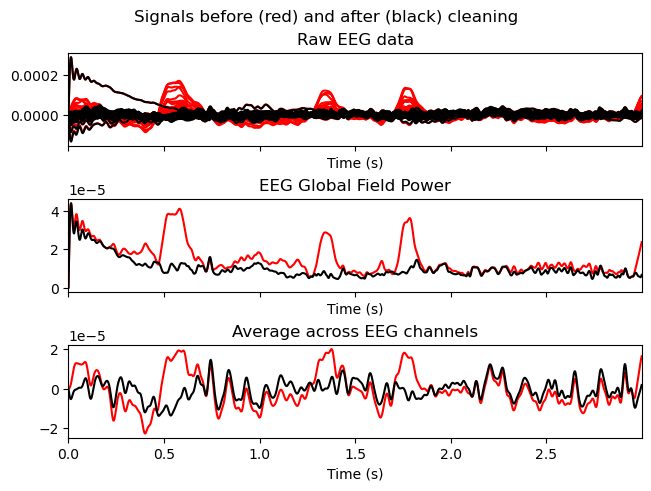

In [44]:
ica.plot_overlay(raw_eeg_1Hz, exclude=[0], picks='eeg');

<div class="alert alert-block alert-warning">
<b>Discussion:</b>

How do we determine which components to exclude? 

</div>

In [79]:
raw_eeg_1Hz.info

Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"9 Stimulus, 59 EEG, 1 EOG"
Bad channels,None
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,1.00 Hz
Lowpass,30.00 Hz


A possible way: correlation with EOG and ECG channel to find eye movement and cardia related ICA components

In [81]:
ica.exclude = []

eog_indices, eog_scores = ica.find_bads_eog(epochs_ica,
                                            #ch_name=['EOG1', 'EOG2'],
                                            threshold='auto',
                                            measure='zscore'
                                            )

print('Number of EOG components identified: ' + str(len(eog_indices)))

# do the same for ecg 
ecg_indices, ecg_scores = ica.find_bads_ecg(epochs_ica,
                                            #ch_name=['ECG1', 'ECG2'],
                                            )
print('Number of ECG components identified: ' + str(len(ecg_indices)))

emg_indices, emg_scores = ica.find_bads_muscle(epochs_ica)

print('Number of EMG components identified: ' + str(len(emg_indices)))

# assign the bad EOG components to the ICA.exclude attribute so they can be removed later
ica.exclude = eog_indices + ecg_indices + emg_indices

Number of EOG components identified: 2
Number of ECG components identified: 0
Number of EMG components identified: 0


In [83]:
ica.plot_scores(eog_scores);

In [84]:
explained_var_ratio = ica.get_explained_variance_ratio(epochs_ica)
print(explained_var_ratio)

{'eeg': 0.9904149217174655}


In [88]:
#Bonus:
# get epochs around Rpeaks
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw_eeg_1Hz, tmin=-0.5, tmax=0.5)
ecg_evoked = ecg_epochs.average()
ecg_evoked.plot_joint();

check out my [preprocessing script](https://github.com/CarinaFo/ExPeCoN_ms/tree/master/code/expecon_ms/eeg/preprocessing) or [IClabel](https://mne.tools/mne-icalabel/dev/index.html) for other options to automate the ICA labelling approach

Nice! We got rid of blinks and high and low frequency noise! With your own data you might want to spend more time on preprocessing. This is an important step! 

In [89]:
save_dir = Path("C:/", "Users", "Carina", "Desktop", "data_liverpool")

In [90]:
raw_eeg_01Hz.save(Path(save_dir, 'liverpool_before_ica-raw.fif'), overwrite=True) 

In [92]:
ica

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,40 iterations on epochs (104139 samples)
ICA components,32
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,ICA000ICA003


In [91]:
# finally apply the ica rejection to the 0.1Hz filtered data
raw_eeg_clean = ica.apply(raw_eeg_01Hz)

In [93]:
# save the clean data
raw_eeg_clean.save(Path(save_dir, 'liverpool_after_prepro_and_ica-raw.fif'), overwrite=True)

<div class="alert alert-block alert-success">
<b>Exercise:</b> 

save the data to your current working directory

where is your current working directory

</div>

<div class="alert alert-block alert-success">
<b>Exercise:</b> save the ica solution disk.
</div>

## Well Done, we cleaned the data and can now go on to the even more fun part!